## Questão 1

In [21]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 9]
from scipy import signal
import scipy.io




In [2]:
def Plot_transformada(sinal,fs):
    sinal = sinal - np.mean(sinal)
    
    sinal_freq = np.fft.fftshift(np.abs(np.fft.fft(sinal)))/max(np.abs(np.fft.fft(sinal))) 
    #calculando fft do sinal

    k = np.linspace(-(fs/2),fs/2,len(sinal))
    #vetor de frequência em Hz
    
    plt.plot(k,sinal_freq)
    plt.title('Transformada de Fourier')
    plt.ylabel('|X(f)|_normalizado')
    plt.xlabel('Frequência (Hz)')
    plt.grid(b=True, which='major', axis='both')
    
    return 

## Item a - 

## Carregando Sinal ECG

In [3]:
data = scipy.io.loadmat('ecg_1.mat')
y = data['x']
x = [row[0] for row in y]
fs_mat = data['fs']
fs = fs_mat[0][0]

## Gráfico

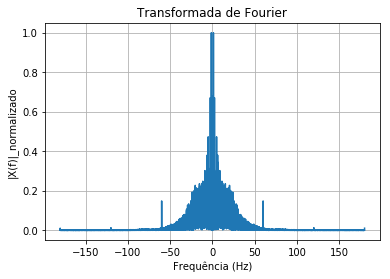

In [4]:
Plot_transformada(x,fs)

## Carregando sinal EMG

In [5]:
data1 = scipy.io.loadmat('emg_1.mat')
y1 = data1['x']
x1 = y1[0].tolist()
fs_mat = data1['fs']
fs1 = fs_mat[0][0]

## Gráfico

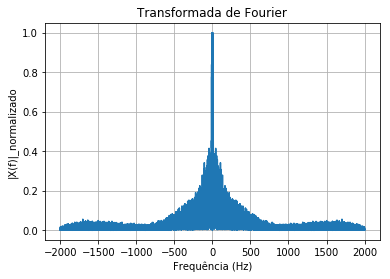

In [6]:
Plot_transformada(x1,fs1)

## Item b - 

Comparando os espectros do sinal de ECG e de EMG, percebe-se que o sinal de EMG possui oscilações de todas as frequências representáveis com a frequência de amostragem adotada, ou há mais ruídos na aquisição do EMG, em contrapartida para o sinal de ECG é possível perceber que após determinada frequência é notável que o que está sendo representado é ruído, pode-se inferir que a banda de conteúdo do ECG é bem mais estreita se comparada com a banda do sinal de EMG.

In [7]:
def calcula_energia_em_banda(sinal,banda,fs):
    
    sinal = sinal - np.mean(sinal)
    
    W = signal.firwin(1001, banda, nyq=fs/2,pass_zero=False)
    sinal_filtrado = np.convolve(sinal,W)
    
    energia_total = np.sum(np.power(np.abs(np.fft.fft(sinal)),2))
    
    energia_na_banda = np.sum(np.power(np.abs(np.fft.fft(sinal_filtrado)),2))
    
    energia_percentual = energia_na_banda/energia_total * 100
    
    return "Energia na banda desejada = " + str(np.round(energia_percentual,2)) + '%'


In [8]:
band = [1,179]
calcula_energia_em_banda(x,band,fs)

'Energia na banda desejada = 94.57%'

In [9]:
band1 = [2,150]
calcula_energia_em_banda(x1,band1,fs1)

'Energia na banda desejada = 67.65%'

## Item e -


Os dois ruídos citados na questão são respectivamente ruído referente a respiração e o ruído presente na rede elétrica. A formação do ruído referente a linha de base é devido ao movimento natural da respiração do indivíduo durante a aquisição do sinal, como o indíviduo não pode ficar sem respirar durante todo o procedimento, é comum observar este ruído nos sinais de ECG. A formação do ruído harmônico observado é devido a interferência eletromagnética dos circuitos condutores de energia elétrica, caso o aparelho que a realiza a aquisição esteja conectado a rede elétrica ou esteja nas proximidades este ruído irá contaminar o sinal coletado, como a maioria dos aparelhos além de estar conectados estão nas proximidades de cabos de condução de energia, há comumente presençã deste ruído nos sinais adquiridos. 

## Item f -


A fim de eliminar os ruídos citados no item (e) deve-se zerar em frequência os coeficientes referentes aquelas, lembrando-se de manter a simetria do sinal. Como o ruído devido a respiração é uma oscilação lenta, filtrar frequências abaixo de 1.5 Hz irá eliminar este ruído. Quando ao ruído induzido pela rede elétrica é necessário filtrar tanto sua frequência fundamental como os seus harmônicos (60,120 e 180 Hz para um Fs = 360).


In [10]:
def filtragem_em_frequencia(sinal,fs):
    ruido_respiração = 0.5
    ruido_rede_eletrica = 60
    harmonico1 = ruido_rede_eletrica * 2
    harmonico2 = ruido_rede_eletrica * 3
    
    indice_passa_baixa = int(ruido_respiração * len(sinal) / fs)
    indice_rede_eletrica = int(ruido_rede_eletrica * len(sinal) / fs)
    indice_harmonico1 = int(harmonico1 * len(sinal) / fs)
    indice_harmonico2 = int(harmonico2 * len(sinal) / fs)
    
       
    sinal_frequencia = np.abs(np.fft.fft(sinal))
    sinal_frequencia[0:indice_passa_baixa] = 0
    sinal_frequencia[(indice_rede_eletrica - 20):(indice_rede_eletrica + 20)] = 0
    sinal_frequencia[(indice_harmonico1 - 20):(indice_harmonico1 + 20)] = 0
    sinal_frequencia[(indice_harmonico2 - 20):(indice_harmonico2 + 20)] = 0
    
    #Para manter a simetria basta somar a cada índice metade do tamanho total do sinal
    
    
    indice_rede_eletrica_refletido = int(indice_rede_eletrica + (len(sinal)/2))
    indice_harmonico1_refletido = int(indice_harmonico1 + (len(sinal)/2))
    indice_harmonico2_refletido = int(indice_harmonico2 + (len(sinal)/2))

    indice_passa_baixa_refletido = int(len(sinal) - indice_passa_baixa)
    sinal_frequencia[-indice_passa_baixa:] = 0
    sinal_frequencia[(indice_rede_eletrica_refletido - 5):(indice_rede_eletrica_refletido + 5)] = 0
    sinal_frequencia[(indice_harmonico1_refletido - 5):(indice_harmonico1_refletido + 5)] = 0
    sinal_frequencia[(indice_harmonico2_refletido - 5):(indice_harmonico2_refletido + 5)] = 0
    
    sinal_no_tempo = np.real(np.fft.ifft(sinal_frequencia))
    sinal_no_tempo = sinal_no_tempo[20:len(sinal_no_tempo) - 20]
    plt.plot(sinal_no_tempo)
    
    print("Índice para filtragem respiração = " + str(indice_passa_baixa) + " e "\
    + str(indice_passa_baixa_refletido) + "\nÍndice frequência fundamental = " + str(indice_rede_eletrica) +\
    " e " + str(indice_rede_eletrica_refletido) + "\nIndice dos harmônicos =" + str(indice_harmonico1) +\
    ", "+ str(indice_harmonico2) + ", " +str(indice_harmonico2_refletido) +", "\
    + str(indice_harmonico1_refletido))
    
    return

Índice para filtragem respiração = 42 e 30678
Índice frequência fundamental = 5120 e 20480
Indice dos harmônicos =10240, 15360, 30720, 25600


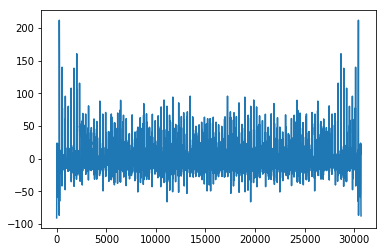

In [11]:
filtragem_em_frequencia(x,fs)

## Item g - 

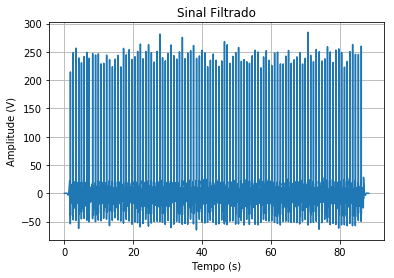

In [12]:
#Filtro para eliminar ruído de linha de base

filtro_passa_altas = signal.firwin(1001, 1, nyq=fs/2,pass_zero=False)

#Filtro para eliminar ruído da rede elétrica e seus harmônicos

filtro_rejeita_faixas = signal.firwin(101, [59,61, 119,121, 179,179.9999], nyq=fs/2)

sinal_filtrado_ecg = np.convolve(x,filtro_passa_altas,mode='full')
sinal_filtrado_ecg1 = np.convolve(sinal_filtrado_ecg,filtro_rejeita_faixas,mode='full')

t = np.linspace(0, len(sinal_filtrado_ecg1)/fs, len(sinal_filtrado_ecg1))

plt.plot(t,sinal_filtrado_ecg1)
plt.title('Sinal Filtrado')
plt.ylabel('Amplitude (V)')
plt.xlabel('Tempo (s)')
plt.grid(b=True, which='major', axis='both')




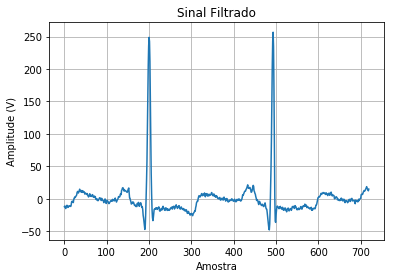

In [13]:
plt.plot(sinal_filtrado_ecg1[720:1440])
plt.title('Sinal Filtrado')
plt.ylabel('Amplitude (V)')
plt.xlabel('Amostra')
plt.grid(b=True, which='major', axis='both')

In [27]:
num, den = signal.butter(3, np.array([0.003]) * 2, btype='high')

In [28]:
filtrado = signal.lfilter(num,den,x)

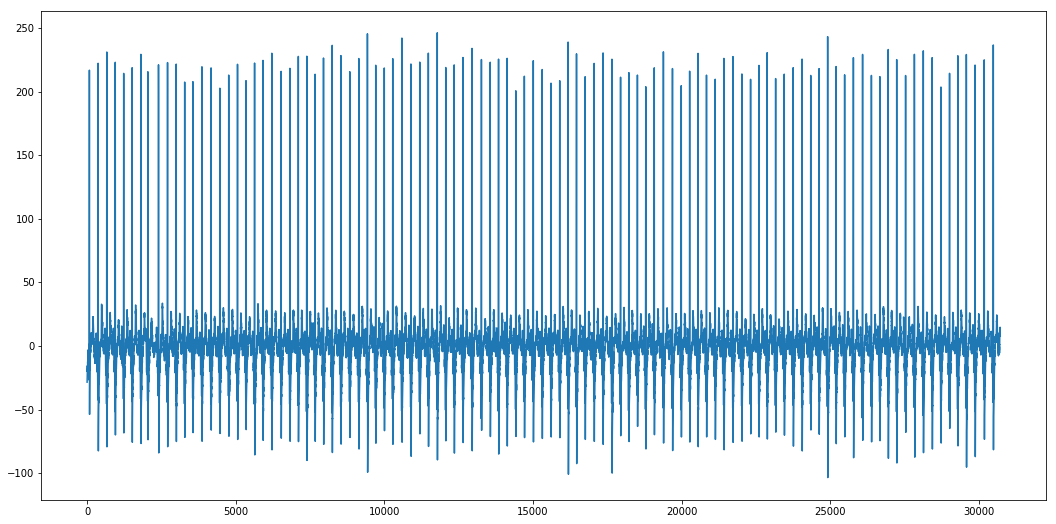

In [29]:
plt.plot(filtrado)

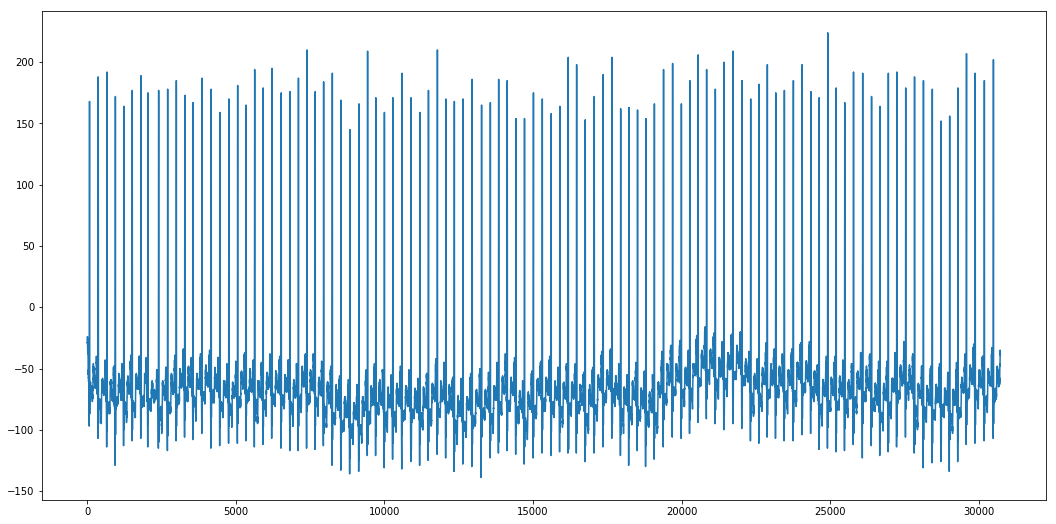

In [22]:
plt.plot(x)